# Turkey Labor Market Analysis
This notebook performs an analysis of trends in employment, unemployment,
and labor force participation in Turkey, with a focus on gender differences 
and regional disparities.

## 1. Introduction

### Research Question
What are the recent trends in women's employment, unemployment, and labor force participation in Turkey? How do they compare with men? Are there any regional differences?

### Source of Data
The data comes from the Turkish Statistical Institute's employment and unemployment section.


## 2. Install and Load Libraries

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load other necessary libraries (in R it was readxl, dplyr, etc.)
from sklearn.model_selection import train_test_split

## 3. Data Loading

In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Loading the dataset (replace with your actual file path)
df = pd.read_excel('RAW.xlsx')

## 4. Data Cleaning

In [11]:
print(df.columns)

Index(['Temel işgücü göstergeleri (Düzey 2)', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Temel işgücü göstergeleri (Düzey 2).1',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Temel işgücü göstergeleri (Düzey 2).2', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')


In [19]:
# Step 1: Rename Columns (ensure you've done this before the following code)
# (This part should be run if you haven't renamed the columns yet.)
df_cleaned = df[['Temel işgücü göstergeleri (Düzey 2)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']]
df_cleaned.columns = ['Province', 'M_LFP', 'M_Emp', 'M_Unemp', 'F_LFP', 'F_Emp', 'F_Unemp']

# Step 2: Assigning the 'Year' column
years = []
current_year = None

# Loop through each province
for province in df_cleaned['Province']:
    province_str = str(province)  # Convert the province to a string
    if province_str.isdigit() and len(province_str) == 4:
        current_year = province_str
        years.append(None)  # Leave the year row itself as None
    else:
        years.append(current_year)  # Assign the current year to the other rows

# Add the 'Year' column to the dataframe using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'Year'] = years

# Dropping rows with NA in 'Year'
df_cleaned = df_cleaned.dropna(subset=['Year'])
df_cleaned['Year'] = df_cleaned['Year'].astype(int)  # Convert Year to integer

# Display the cleaned dataframe
df_cleaned.head()



C:\Users\ammar\AppData\Local\Temp\ipykernel_24356\331632303.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Year'] = years


,Province,M_LFP,M_Emp,M_Unemp,F_LFP,F_Emp,F_Unemp,Year
5,TR10 (İstanbul),44.9,14.7,NaN,62.1,13.7,NaN,2020
6,"TR21 (Tekirdağ, Edirne, Kırklareli)",50.7,9,NaN,67.6,7.2,NaN,2020
7,"TR22 (Balıkesir, Çanakkale)",43.5,7.9,NaN,59.2,7,NaN,2020
8,TR31 (İzmir),42.7,17.1,NaN,58.5,14.8,NaN,2020
9,"TR32 (Aydın, Denizli, Muğla)",45.8,9.7,NaN,60.3,8.9,NaN,2020


## Data Manipulation

In [20]:
# Splitting male and female data
male_data = df_cleaned[['Year', 'Province', 'M_LFP', 'M_Emp', 'M_Unemp']].rename(columns={'M_LFP': 'LFP', 'M_Emp': 'Emp', 'M_Unemp': 'Unemp'})
female_data = df_cleaned[['Year', 'Province', 'F_LFP', 'F_Emp', 'F_Unemp']].rename(columns={'F_LFP': 'LFP', 'F_Emp': 'Emp', 'F_Unemp': 'Unemp'})

# Adding gender column
male_data['Gender'] = 'Male'
female_data['Gender'] = 'Female'

# Combine male and female data
combined_data = pd.concat([male_data, female_data])

# Ensuring the data is ordered properly by year and province
combined_data = combined_data.sort_values(by=['Year', 'Province'])

# Display the combined dataset
combined_data.head()


,Year,Province,LFP,Emp,Unemp,Gender
5,2020,TR10 (İstanbul),44.9,14.7,NaN,Male
5,2020,TR10 (İstanbul),62.1,13.7,NaN,Female
6,2020,"TR21 (Tekirdağ, Edirne, Kırklareli)",50.7,9,NaN,Male
6,2020,"TR21 (Tekirdağ, Edirne, Kırklareli)",67.6,7.2,NaN,Female
7,2020,"TR22 (Balıkesir, Çanakkale)",43.5,7.9,NaN,Male


## Data Exploration

In [21]:
# Checking the structure and basic statistics
print(combined_data.info())
print(combined_data.describe())

# Checking for missing values
combined_data.isnull().sum()

# Display the first few rows
combined_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 5 to 85
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      166 non-null    int32  
 1   Province  164 non-null    object 
 2   LFP       156 non-null    object 
 3   Emp       164 non-null    object 
 4   Unemp     0 non-null      float64
 5   Gender    166 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 8.4+ KB
None
              Year  Unemp
count   166.000000    0.0
mean   2021.060241    NaN
std       0.829010    NaN
min    2020.000000    NaN
25%    2020.000000    NaN
50%    2021.000000    NaN
75%    2022.000000    NaN
max    2022.000000    NaN


,Year,Province,LFP,Emp,Unemp,Gender
5,2020,TR10 (İstanbul),44.9,14.7,NaN,Male
5,2020,TR10 (İstanbul),62.1,13.7,NaN,Female
6,2020,"TR21 (Tekirdağ, Edirne, Kırklareli)",50.7,9,NaN,Male
6,2020,"TR21 (Tekirdağ, Edirne, Kırklareli)",67.6,7.2,NaN,Female
7,2020,"TR22 (Balıkesir, Çanakkale)",43.5,7.9,NaN,Male


## Data Analysis and Visualization

5.1. Trends Over the Years:
We can analyze the trends in labor force participation (LFP), employment (Emp), and unemployment (Unemp) over the years.

LFP       10
Emp       10
Unemp    166
dtype: int64


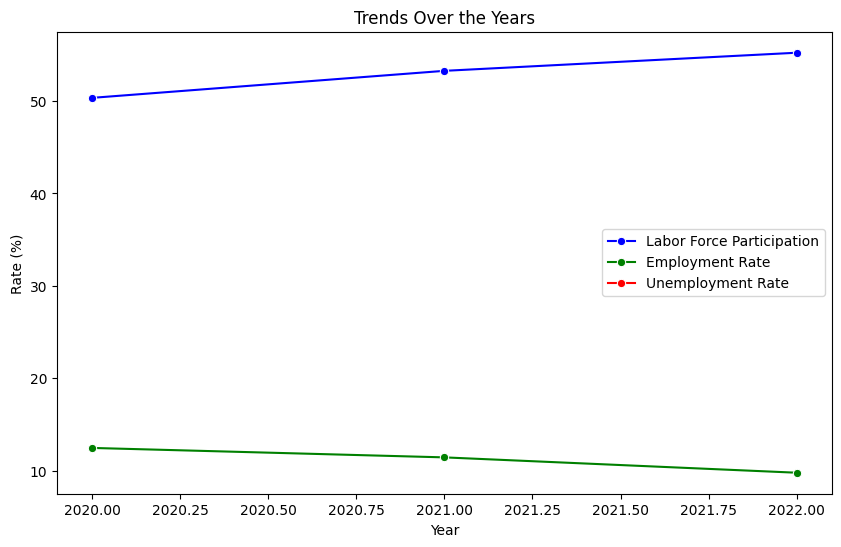

In [23]:
# Convert columns to numeric, forcing non-numeric values to NaN
combined_data['LFP'] = pd.to_numeric(combined_data['LFP'], errors='coerce')
combined_data['Emp'] = pd.to_numeric(combined_data['Emp'], errors='coerce')
combined_data['Unemp'] = pd.to_numeric(combined_data['Unemp'], errors='coerce')

# Check for non-numeric values or missing data
print(combined_data[['LFP', 'Emp', 'Unemp']].isnull().sum())

# Now, group by year and calculate the mean
trends_data = combined_data.groupby('Year').agg({'LFP': 'mean', 'Emp': 'mean', 'Unemp': 'mean'}).reset_index()

# Plot trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='LFP', data=trends_data, label='Labor Force Participation', color='blue', marker='o')
sns.lineplot(x='Year', y='Emp', data=trends_data, label='Employment Rate', color='green', marker='o')
sns.lineplot(x='Year', y='Unemp', data=trends_data, label='Unemployment Rate', color='red', marker='o')
plt.title('Trends Over the Years')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()


5.2. Gender Differences:
We can analyze the differences in labor force participation, employment, and unemployment between males and females.

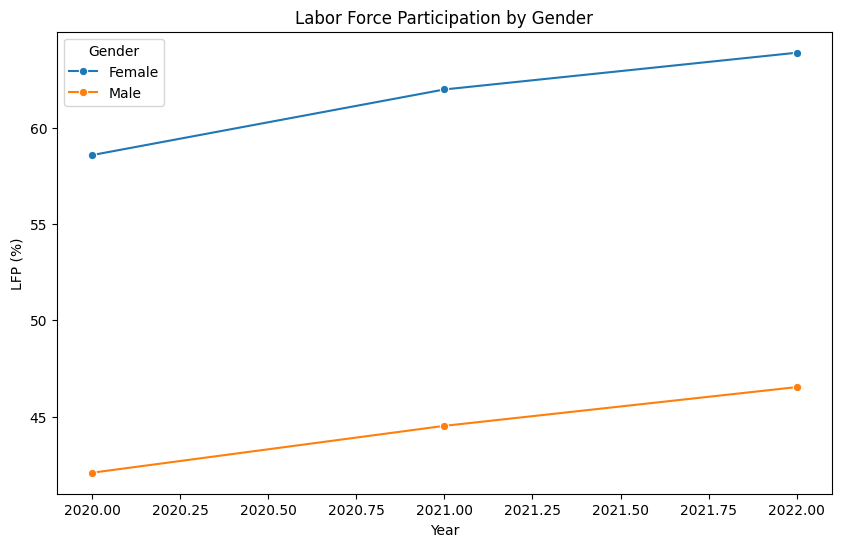

In [24]:
# Grouping data by Year and Gender for gender-based analysis
gender_data = combined_data.groupby(['Year', 'Gender']).agg({'LFP': 'mean', 'Emp': 'mean', 'Unemp': 'mean'}).reset_index()

# Plot gender disparities in Labor Force Participation
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='LFP', hue='Gender', data=gender_data, marker='o')
plt.title('Labor Force Participation by Gender')
plt.ylabel('LFP (%)')
plt.show()


5.3. Provincial Differences:
We can analyze labor force participation, employment, and unemployment rates across provinces for the year 2022.

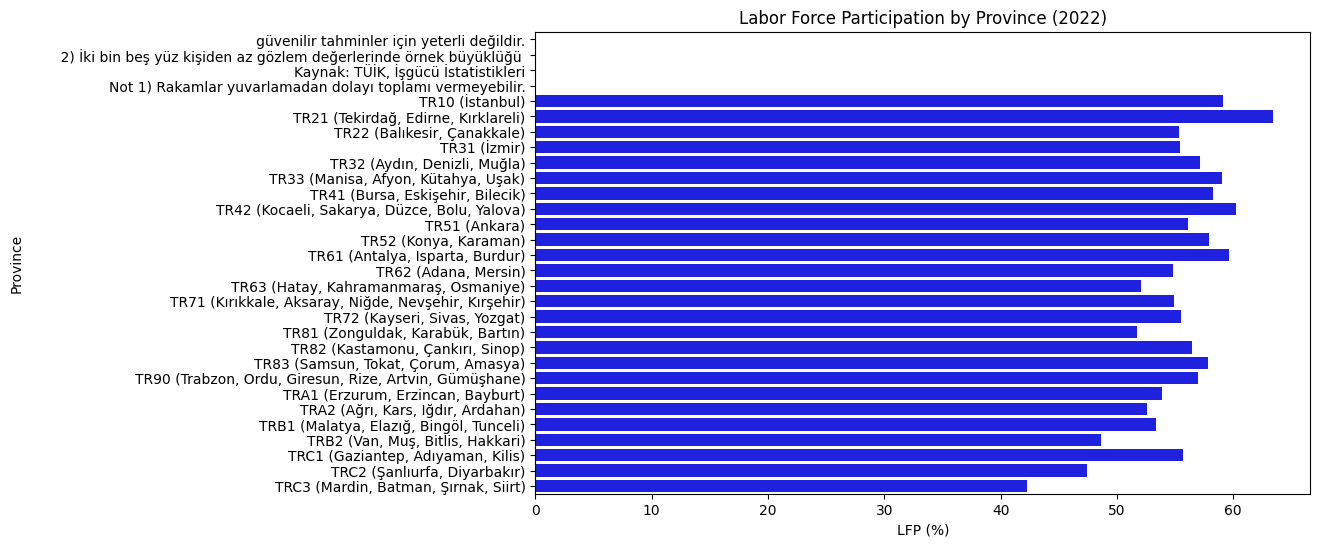

In [25]:
# Filter the dataset for the year 2022
province_data_2022 = combined_data[combined_data['Year'] == 2022].groupby('Province').agg({'LFP': 'mean', 'Emp': 'mean', 'Unemp': 'mean'}).reset_index()

# Plot labor force participation by province
plt.figure(figsize=(10, 6))
sns.barplot(x='LFP', y='Province', data=province_data_2022, color='blue')
plt.title('Labor Force Participation by Province (2022)')
plt.xlabel('LFP (%)')
plt.ylabel('Province')
plt.show()


5.4. Provincial Differences by Gender:
We can further break down the labor force participation, employment, and unemployment rates by gender across provinces for the year 2022.

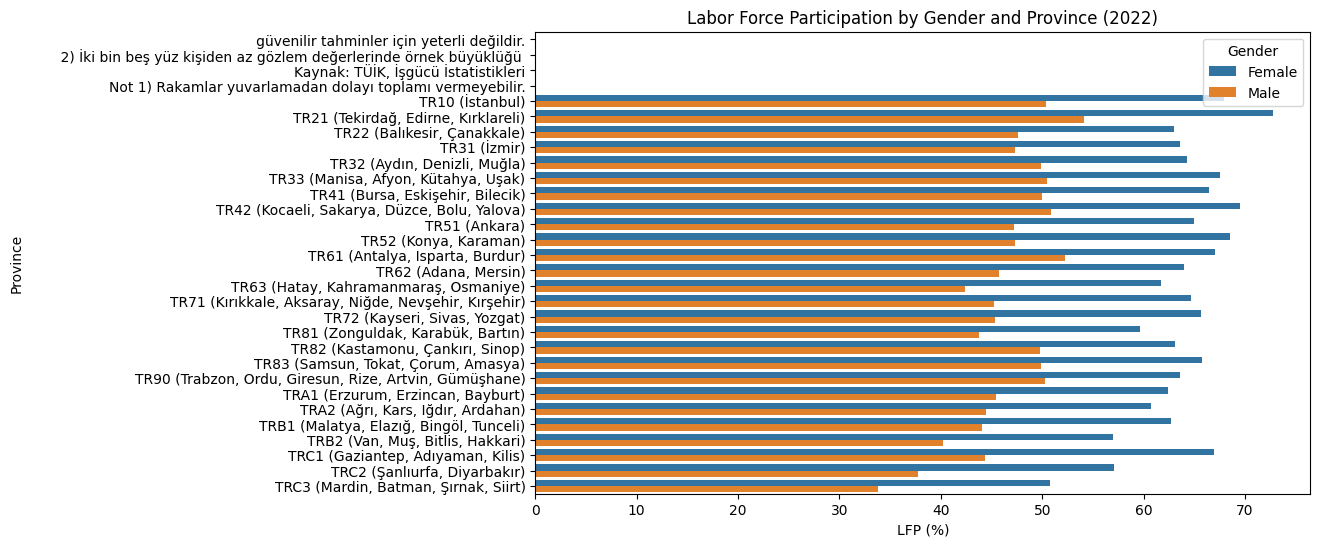

In [26]:
# Grouping provincial data by Province and Gender for 2022
gender_province_data_2022 = combined_data[combined_data['Year'] == 2022].groupby(['Province', 'Gender']).agg({'LFP': 'mean', 'Emp': 'mean', 'Unemp': 'mean'}).reset_index()

# Plot labor force participation by gender and province
plt.figure(figsize=(10, 6))
sns.barplot(x='LFP', y='Province', hue='Gender', data=gender_province_data_2022)
plt.title('Labor Force Participation by Gender and Province (2022)')
plt.xlabel('LFP (%)')
plt.ylabel('Province')
plt.show()


## Data Interpretation:
After performing the analysis, you can summarize your findings.

Labor Market Trends: The overall labor force participation and employment rates have improved over the years, with some fluctuations in unemployment rates.
Gender Disparities: Significant gender disparities persist in labor force participation and employment rates, with men generally having higher participation rates.
Provincial Differences: There are noticeable provincial differences in labor force participation, employment, and unemployment rates, with certain provinces showing better labor market conditions than others.